In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('creditcard.csv')

# DATA EXPLORATION

In [4]:
# TOP 5 ROWS

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# DIMENSIONS OF THE DATA SET

df.shape

# This data has 31 columns and 284807 rows 


(284807, 31)

In [6]:
# DATA SUMMARY

df.info()

# This dataset is already a PCA reduced dataset with V1 to V28 are PCs 
# The only non PCA applied columns are Time and Amount
# Time indicates the time lapsed between transactions

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# SUMMARISING THE non transformed column

df['Amount'].describe()

# The smallest transaction amount is 0 and highest is 25691

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

# DATA CLEANING

In [12]:
# NULL VALUES DETECTION AND HANDLING

# A new way to check for any null values at all in data. Returns a boolean index

df.isnull().values.any()

False

In [17]:
df.isnull().sum()

# This return a numerical value for each column

0

In [ ]:
# Either way there are no missing values

# DATA DUPLICATION

In [20]:
# CHECKING FOR DUPLICATES

df.duplicated().any()

True

In [21]:
df.duplicated().sum()

1081

In [ ]:
# We have 1081 Duplicate rows which means they can be removed to reduce duplication

In [24]:
df = df.drop_duplicates(keep = 'first')

In [26]:
# Removed the duplicates and we now have 283726 rows

df 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


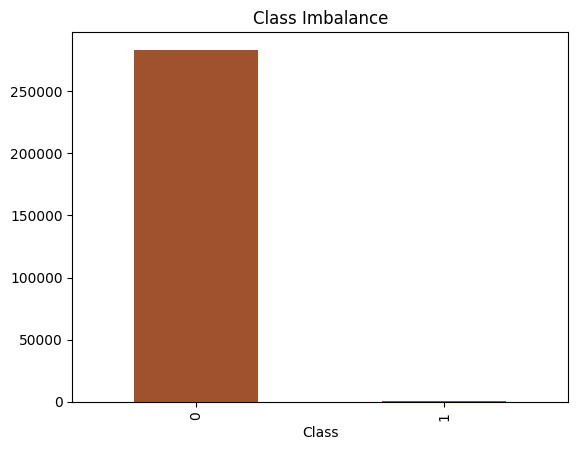

In [34]:
# CLASS IMBALNCE CHECK
df.groupby('Class').size().plot(kind = 'bar', color = '#a0522d')
plt.title("Class Imbalance")
plt.show()



In [60]:
print(f'Percent of Not Fraudulent transactions = {round(len(df[df["Class"]== 0])/len(df["Class"]),4)*100}')
print(f'Percent of Fradulent transactions = {round(len(df[df["Class"]== 1])/len(df["Class"]),4)*100}')

Percent of Not Fraudulent transactions = 99.83
Percent of Fradulent transactions = 0.16999999999999998


In [45]:
# A huge class imbalance is seen as 99.83% of transactions are non fraudulent and only 0.16% are. 
# Before progressing to model building we need to take care of the imbalance

283726

In [ ]:
# TIME DISTRIBUTION OF FRAUDULENT PLOTS

The fraudulent transaction have happened throughout and not stuck to a time frame

In [85]:
class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]


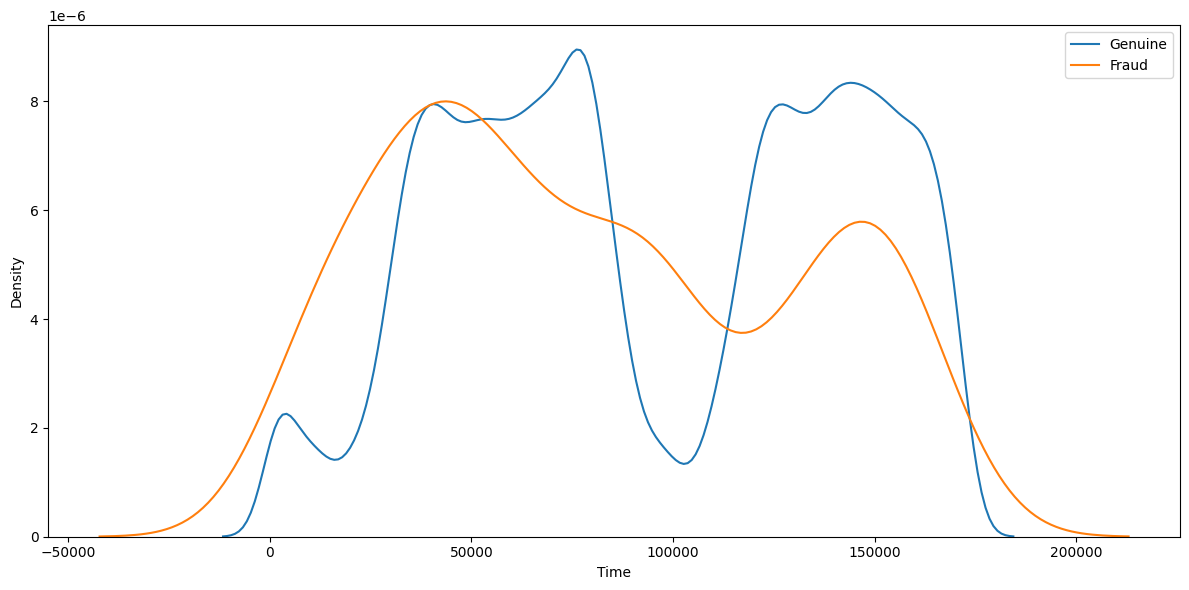

In [84]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(class_0, ax = ax)
sns.kdeplot(class_1, ax = ax)
ax.legend(['Genuine', 'Fraud'])
plt.tight_layout()
plt.show()

In [89]:
# IN DEPTH TIME DISTRIBUTION OF CLASSES

# Creating hourly distribution of transactions from the time column in seconds


df['hour'] = df['Time'].apply(lambda x : np.floor(x/3600))

In [95]:

agg = df.groupby(['hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()


In [96]:
agg

,hour,Class,min,max,count,sum,mean,median,var
0,0.0,0,0.00,7712.43,3929,255825.95,65.112230,12.990,45961.838558
1,0.0,1,0.00,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.00,1769.69,2211,145744.59,65.917951,23.000,20085.295527
3,1.0,1,59.00,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.00,4002.88,1552,106983.39,68.932597,17.985,45434.509936
...,...,...,...,...,...,...,...,...,...
89,45.0,1,12.31,39.98,2,52.29,26.145000,26.145,382.814450
90,46.0,0,0.00,25691.16,6429,448494.71,69.761193,15.000,132855.109619
91,46.0,1,0.00,634.30,6,1433.23,238.871667,194.490,67185.062017
92,47.0,0,0.00,10199.44,4824,332456.59,68.917204,14.015,56434.557064


In [ ]:
# HOURLY DISTRIBUTION OF CLASSES

# TOTAL AMOUNT


# Fradulent transactions have happened all the hours 
# Most of genuine transactions account occured between 10-20 hour time frame with lower transactions at night
# and followed the same pattern next day

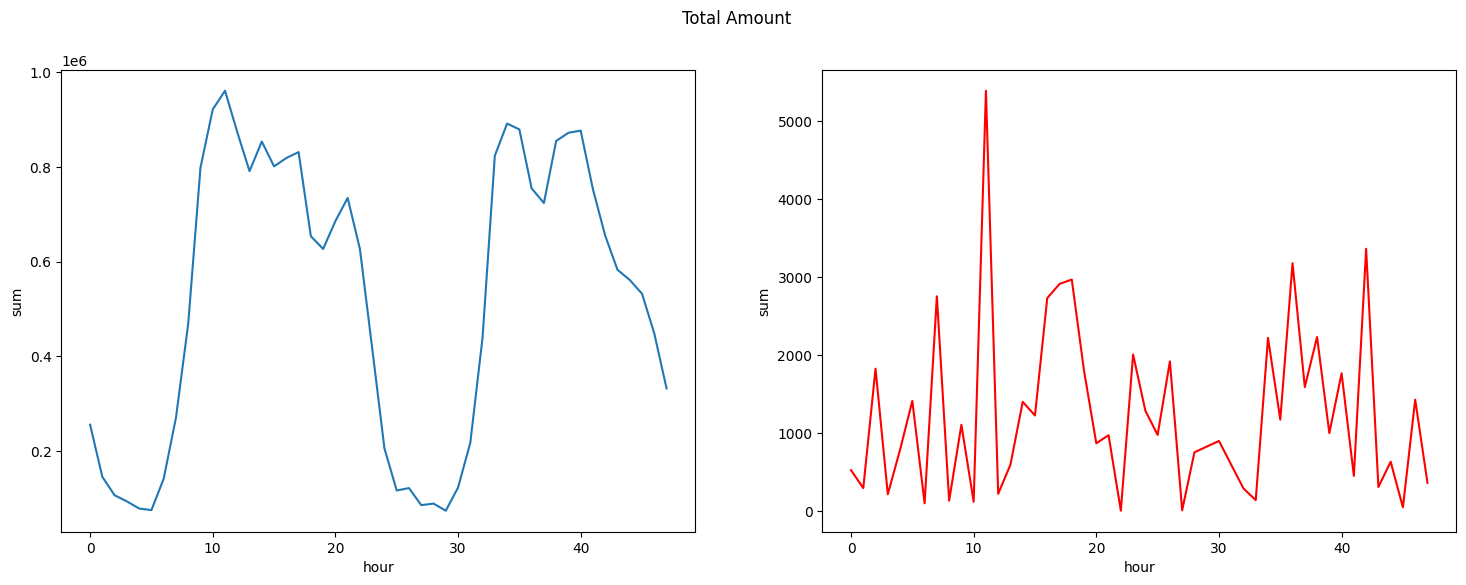

In [109]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="hour", y="sum", data=agg.loc[agg.Class==0])
s = sns.lineplot(ax = ax2, x="hour", y="sum", data=agg.loc[agg.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show();

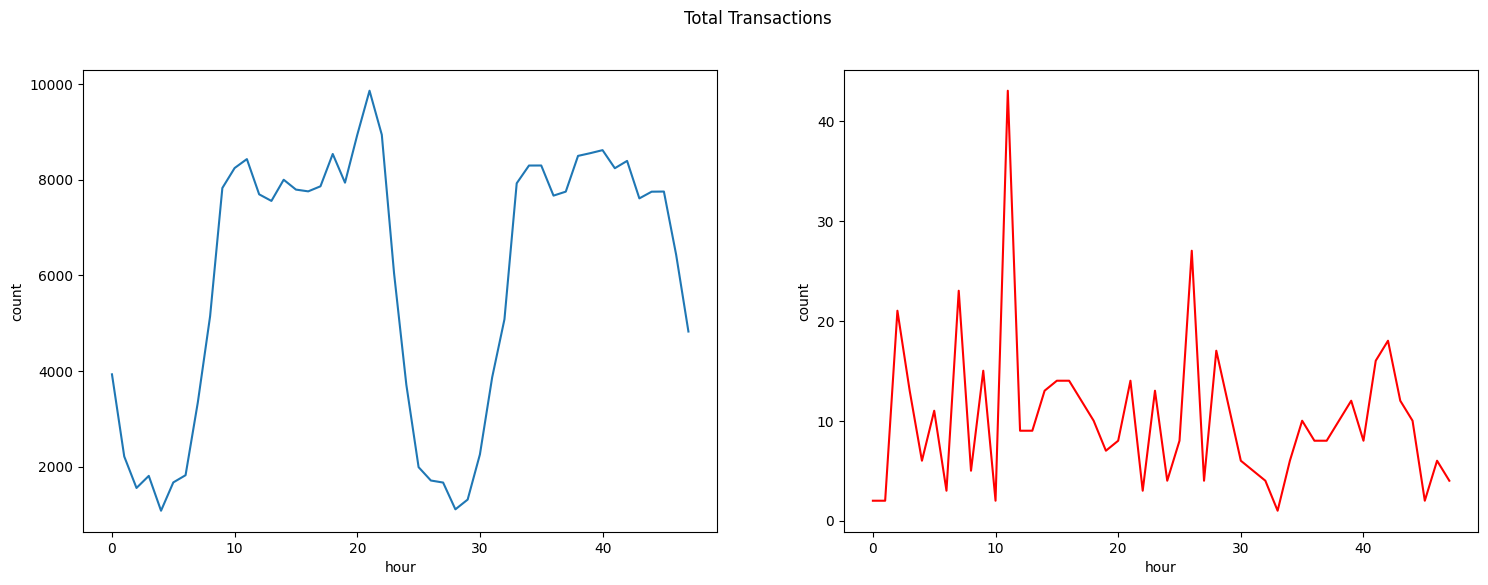

In [112]:
# TOTAL TRANSACTIONS

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="hour", y="count", data=agg.loc[agg.Class==0])
s = sns.lineplot(ax = ax2, x="hour", y="count", data=agg.loc[agg.Class==1], color="red")
plt.suptitle("Total Transactions")
plt.show();


# The highest fraudulent transactions occured at 12 hours with 42 transactions

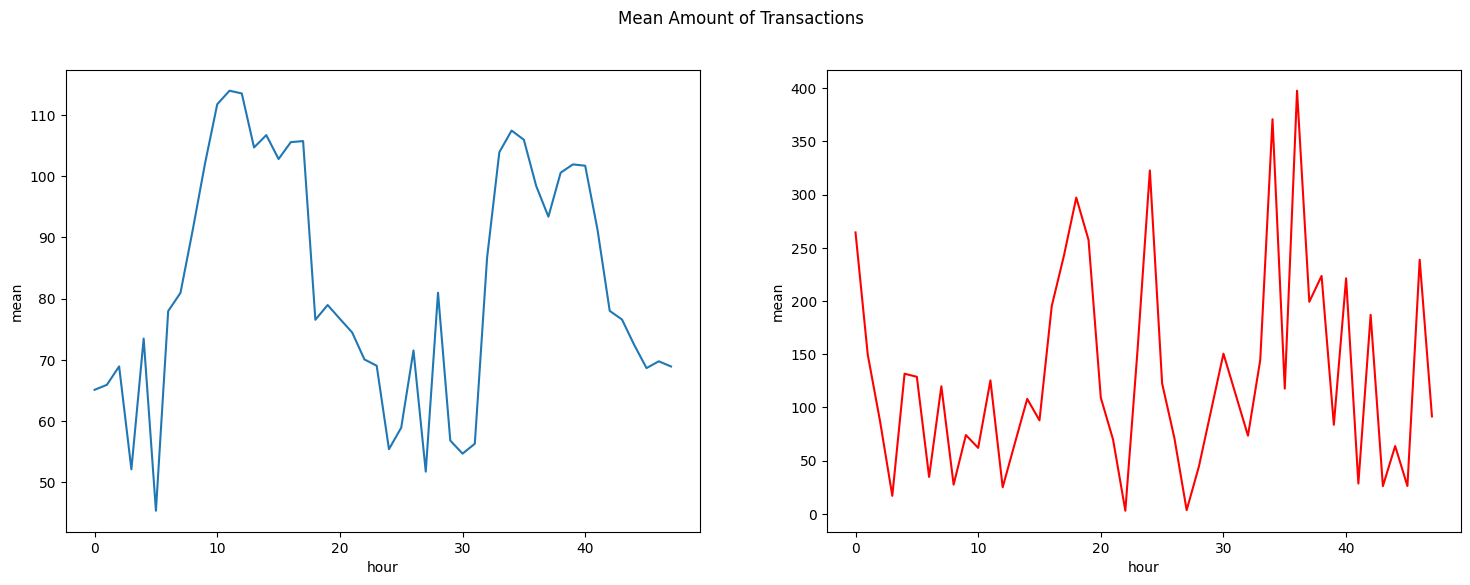

In [114]:
# MEAN AMOUNT IN TRANSACTIONS

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="hour", y="mean", data=agg.loc[agg.Class==0])
s = sns.lineplot(ax = ax2, x="hour", y="mean", data=agg.loc[agg.Class==1], color="red")
plt.suptitle("Average Amount of Transactions")
plt.show();




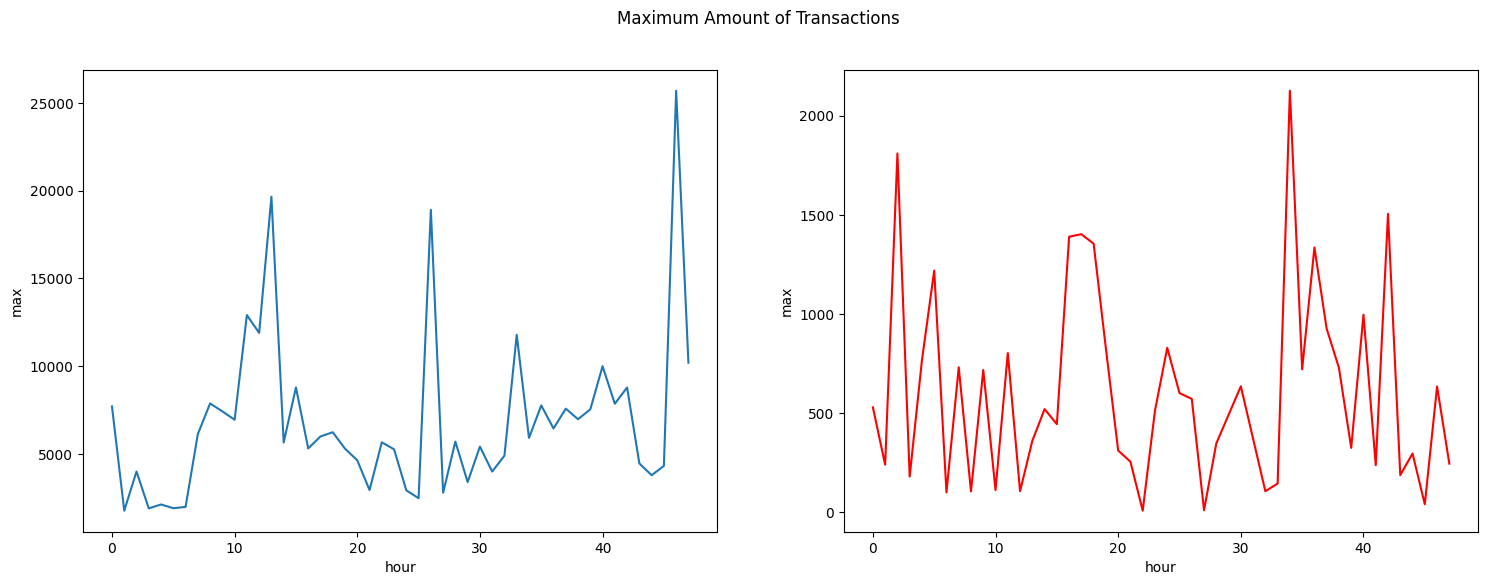

In [115]:
# MAXIMUM AMOUNT OF TRANSACTIONS
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="hour", y="max", data=agg.loc[agg.Class==0])
s = sns.lineplot(ax = ax2, x="hour", y="max", data=agg.loc[agg.Class==1], color="red")
plt.suptitle("Maximum Amount of Transactions")
plt.show();

# The maximum amount in genuine transactions is over 25000 while in fradulent is slightly over 2000

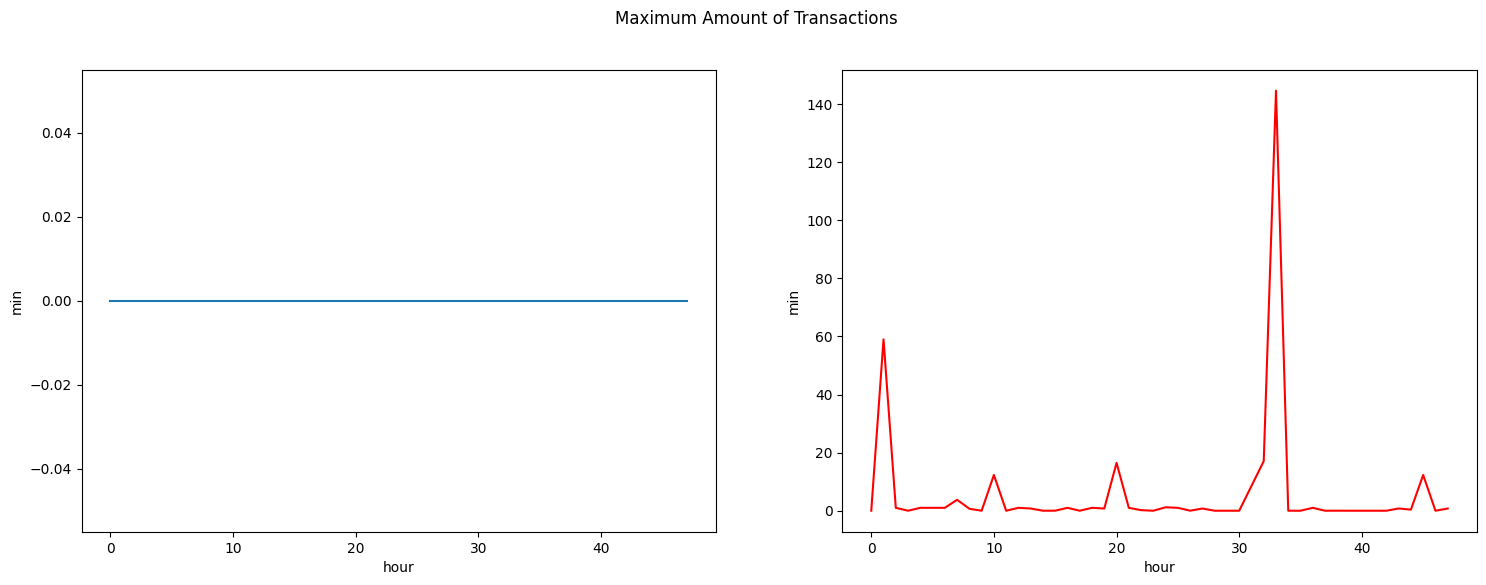

In [116]:
# MAXIMUM AMOUNT OF TRANSACTIONS
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="hour", y="min", data=agg.loc[agg.Class==0])
s = sns.lineplot(ax = ax2, x="hour", y="min", data=agg.loc[agg.Class==1], color="red")
plt.suptitle("Minimum Amount of Transactions")
plt.show();

# The minimum amount in transactions for genuine is zero while for fraudulent at different hours range between 0-150

In [ ]:
# FEATURE CORRELATION

# Though most of the features have been scaled and tranformed alreay and we do not know what they are, its a good idea
# if some of these features have more importance we can recommend working on those features to prevent fradulent 
# transactions

<AxesSubplot: >

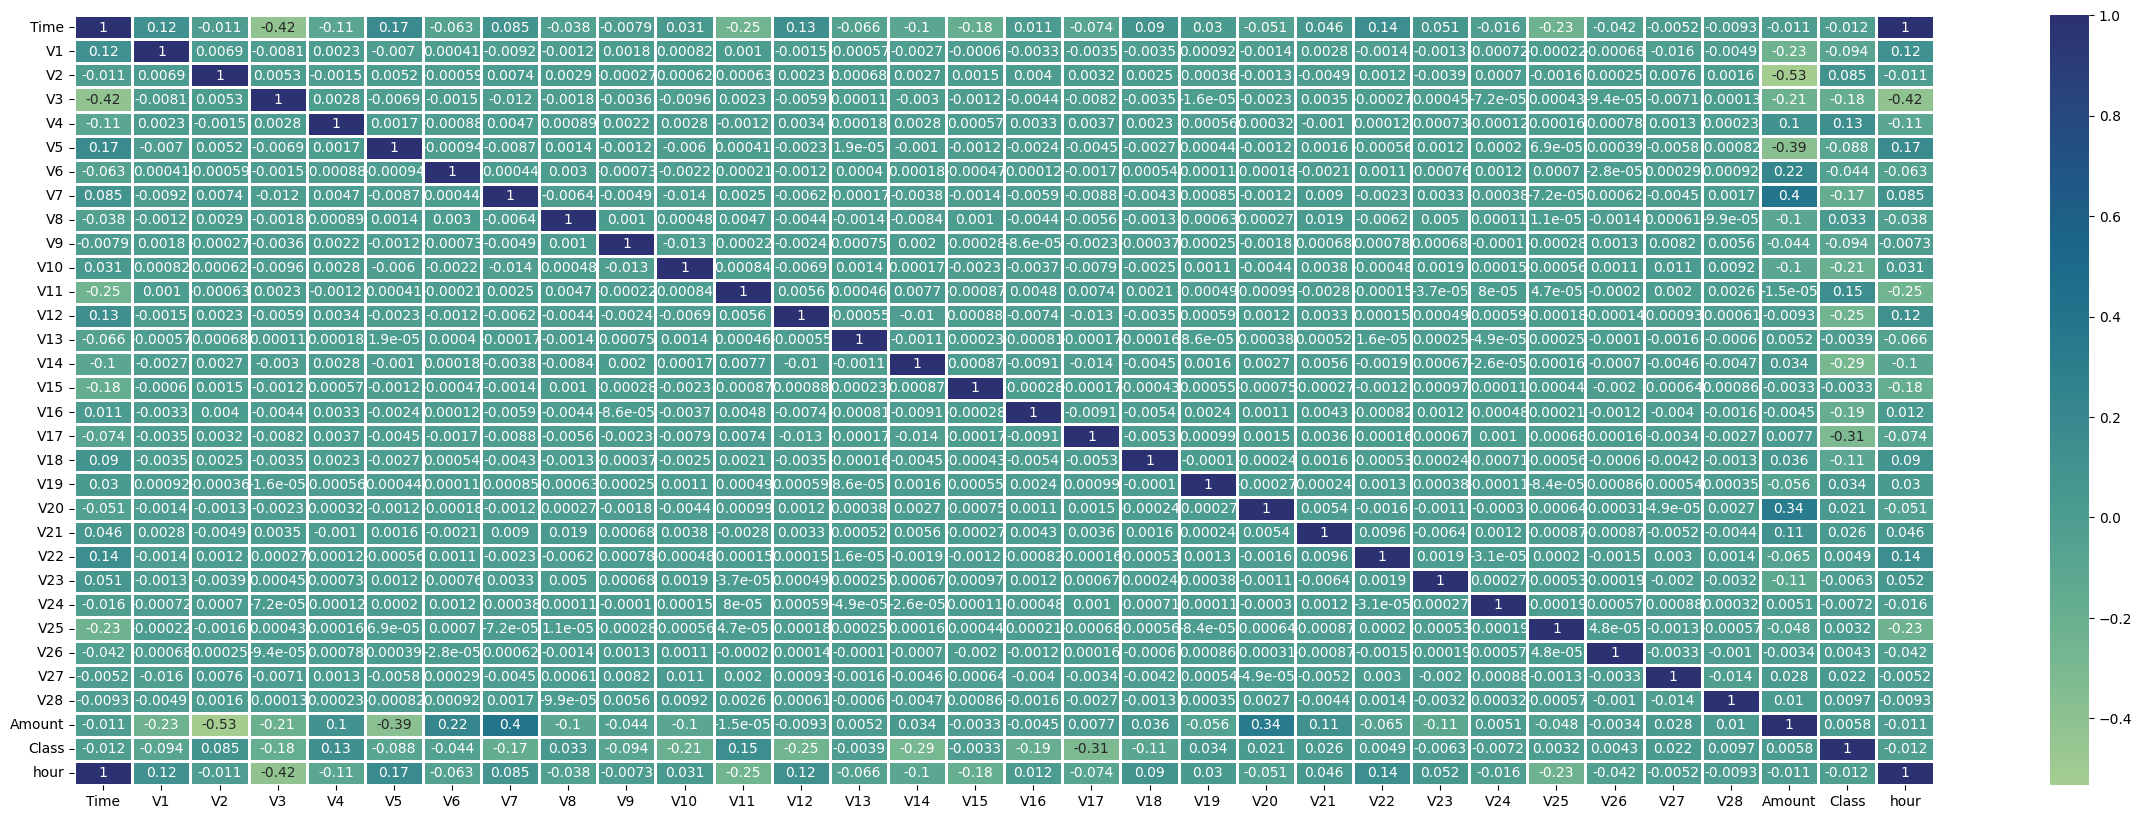

In [122]:

plt.figure(figsize = (30,10))
sns.heatmap(df.corr(), annot = True, cmap = 'crest', linewidth = 1)

# 1. V7 and V20 have direct correlation with amount

In [124]:
# FEATURE SCALING

# All the data were already scaled before PCA on all the features columns, the non scaled components are Amount and class
# Scaling the non scaled features first before addressing class imbalance problem


from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

sc = StandardScaler()
rc = RobustScaler()

df['scaled_amount'] = rc.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rc.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)


# Amount and Time values are now scaled and are labelled as scaled_time and scaled_amount

KeyError: 'Amount'

In [126]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Class,hour,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.0,1.774718,-0.995290
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.0,-0.268530,-0.995290
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0.0,4.959811,-0.995279
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.0,1.411487,-0.995279
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.0,0.667362,-0.995267


In [128]:
# Rearranging the scaled time and amount columns to be the first in the dataframe

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df = df.drop(['scaled_amount', 'scaled_time'], axis=1)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)


df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,hour
0,1.774718,-0.995290,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.0
1,-0.268530,-0.995290,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.0
2,4.959811,-0.995279,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0.0
3,1.411487,-0.995279,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.0
4,0.667362,-0.995267,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.0


In [ ]:
# SPLITTING DATA INTO TEST AND TRAIN

# Splitting the original dataset before undersampling so that we test the trained model on the original test data rather
# than undersampled data

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold


# Dropping the target for X
X = df.drop('Class', axis=1)

# Keeping the target in y
y = df['Class']

# Doing a stratified Split 

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]


Train: [ 30191  30261  30275 ... 283723 283724 283725] Test: [    0     1     2 ... 56805 56806 56807]
Train: [     0      1      2 ... 283723 283724 283725] Test: [ 30191  30261  30275 ... 113535 113536 113537]
Train: [     0      1      2 ... 283723 283724 283725] Test: [ 77084  77379  79220 ... 170292 170293 170294]
Train: [     0      1      2 ... 283723 283724 283725] Test: [149302 150027 150068 ... 226999 227000 227001]
Train: [     0      1      2 ... 226999 227000 227001] Test: [212341 212365 213905 ... 283723 283724 283725]


In [132]:
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

In [133]:
# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99833466 0.00166534]
[0.99832584 0.00167416]


In [145]:
# UNDERSAMPLING FOR IMBALANCED CLASSES

# Using undersampling so that the genuine transactions are reduced to the same number as fradulent ones

df1 = df.sample(frac = 1)

# Number of fraud rows in data is 492
fraud_df = df.loc[df['Class'] == 1]
genuine_df = df.loc[df['Class'] == 0][:473]

In [148]:
# Balanced class dataframe

balanced_df = pd.concat([fraud_df, genuine_df])

In [149]:
balanced_df

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,hour
541,-0.305938,-0.990519,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,0.0
623,7.050480,-0.989744,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,0.0
4920,3.030594,-0.942854,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,1.0
6108,0.514532,-0.913192,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,1.0
6329,-0.292032,-0.906929,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,-0.111389,-0.991154,-0.703183,1.210704,0.713731,1.146381,0.196790,0.468060,0.204977,0.627389,...,-0.052939,0.044339,-0.184853,-0.776439,0.021548,-0.166427,0.297892,0.128381,0,0.0
476,-0.268808,-0.991154,-1.046362,0.720386,1.603413,0.608371,0.460941,-1.423406,0.266079,-0.141048,...,-0.231027,-0.529575,-0.106293,0.704604,-0.349903,0.146041,0.289965,0.159572,0,0.0
477,-0.126964,-0.991142,1.135846,0.084164,0.269573,1.210034,0.005128,0.318050,-0.082664,0.191049,...,-0.076927,-0.063246,-0.110678,-0.306079,0.651983,-0.308067,0.030276,0.001831,0,0.0
478,8.201363,-0.991142,0.150999,-3.002120,0.824301,0.231721,-2.621415,0.128843,-0.755233,0.095956,...,0.521719,0.320297,-0.591253,0.447557,0.164080,-0.131897,-0.047547,0.130266,0,0.0


In [183]:
# To shuffle the new dataframe


df3 = balanced_df.sample(frac=1, random_state=34)

df3

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,hour
145,-0.084967,-0.994221,-1.822273,1.235336,-0.307804,-1.821824,2.762482,3.641499,-0.344614,-1.547541,...,2.080848,-1.591888,0.321636,0.889258,0.156445,-0.960611,-0.035302,0.182321,0,0.0
220,-0.222500,-0.993586,-2.420413,1.947885,0.553646,0.983069,-0.281518,2.408958,-1.401613,-0.188299,...,1.213826,-1.238620,0.006927,-1.724222,0.239603,-0.313703,-0.188281,0.119831,0,0.0
89190,19.192880,-0.261190,-5.344665,-0.285760,-3.835616,5.337048,-7.609909,3.874668,1.289630,0.201742,...,0.276011,1.342045,-1.016579,-0.071361,-0.335869,0.441044,1.520613,-1.115937,1,17.0
42007,-0.295369,-0.514430,-3.140260,3.367342,-2.778931,3.859701,-1.159518,-0.721552,-4.195342,-0.598346,...,2.452339,-0.292963,-0.189330,-0.166482,0.038040,-0.015477,0.776691,0.397557,1,11.0
42009,1.256154,-0.514418,-2.740483,3.658095,-4.110636,5.340242,-2.666775,-0.092782,-4.388699,-0.280133,...,2.417495,-0.097712,0.382155,-0.154757,-0.403956,0.277895,0.830062,0.218690,1,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,0.319844,-0.992834,1.228501,0.091870,-0.268385,0.748905,0.449027,0.453604,-0.013060,0.098526,...,-0.098694,-0.410240,-0.271817,-1.419977,0.701940,-0.335895,0.003435,0.003994,0,0.0
407,0.709220,-0.991835,-1.097477,1.246236,0.464855,-0.178196,0.249499,-0.725058,1.197760,-0.358585,...,-0.050148,0.114628,-0.188974,-0.066727,-0.160964,0.275263,0.117647,0.272015,0,0.0
17,-0.293561,-0.995138,-0.436905,0.918966,0.924591,-0.727219,0.915679,-0.127867,0.707642,0.087962,...,-0.194796,-0.672638,-0.156858,-0.888386,-0.342413,-0.049027,0.079692,0.131024,0,0.0
42769,1.339174,-0.510681,-10.281784,6.302385,-13.271718,8.925115,-9.975578,-2.832513,-12.703253,6.706846,...,2.479414,0.366933,0.042805,0.478279,0.157771,0.329901,0.163504,-0.485552,1,11.0


In [184]:
# CHECKING IF CLASS IMBALANCE HAS BEEN RECTIFIED

class_balance = pd.DataFrame(df3["Class"].value_counts()/len(df3))
class_balance


,Class
0,0.5
1,0.5


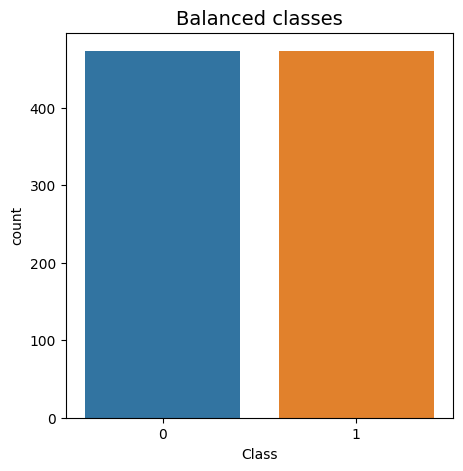

In [185]:
plt.figure(figsize = (5,5))
sns.countplot(x ='Class', data= df3)
plt.title('Balanced classes', fontsize=14)
plt.show()


In [ ]:
# # INSIGHTS INTO NEXT STEPS
# The wider the gap between the training score and the cross validation score, 
# the more likely your model is overfitting (high variance).
# If the score is low in both training and cross-validation sets this is an indication 
# that our model is underfitting (high bias)
# Logistic Regression Classifier shows the best score in both training and cross-validating sets.

In [191]:
# SPLITTING THE BALANCED DATASET
X = df3.drop("Class", axis = 1)
y = df3["Class"]

In [192]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 43)

In [190]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [195]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,hour
64411,1.084550,-0.394361,-10.527304,7.639745,-13.443115,4.303403,-8.048210,-3.466997,-8.643193,7.284105,...,0.847085,0.937416,-0.931178,-0.235697,-0.031393,0.591558,-0.263516,1.108897,0.219021,14.0
233258,13.548463,0.738114,-1.611877,-0.408410,-3.829762,6.249462,-3.360922,1.147964,1.858425,0.474858,...,2.425677,1.245582,0.616383,2.251439,-0.066096,0.538710,0.541325,-0.136243,-0.009852,40.0
188,-0.219163,-0.993833,1.105253,0.541842,0.839421,2.570933,-0.279517,-0.423062,0.088019,0.011622,...,-0.239883,-0.137434,-0.460991,0.189397,0.556329,0.185786,-0.189030,0.000208,0.026167,0.0
203324,-0.292032,0.588454,-0.079653,3.222010,-3.724201,6.037345,0.583395,-0.691346,-1.799885,-2.627781,...,1.198537,-0.664694,1.138556,-0.350753,-0.287467,0.808889,0.823962,0.668497,0.595610,37.0
79835,-0.281602,-0.311347,0.340391,2.015233,-2.777330,3.812024,-0.461729,-1.152022,-2.001959,0.548681,...,0.326773,0.299769,-0.583283,-0.187696,-0.329256,0.732328,0.058080,0.553143,0.318832,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,-0.293561,-0.991401,1.220164,0.330421,0.518020,0.823179,-0.680719,-1.391443,0.058431,-0.205430,...,-0.136175,-0.259713,-0.778005,0.202685,0.862149,0.126259,0.063438,-0.025917,0.034840,0.0
81609,19.017661,-0.301804,-2.326922,-3.348439,-3.513408,3.175060,-2.815137,-0.203363,-0.892144,0.333226,...,3.209171,1.226648,-0.695902,-1.478490,-0.061553,0.236155,0.531911,0.302324,0.536375,16.0
147,3.431790,-0.994209,0.607153,-0.957413,0.761505,1.590050,-1.177298,0.011232,-0.166991,0.152720,...,0.304714,0.166237,0.100682,-0.317001,0.543778,0.484232,-0.330425,-0.001545,0.062098,0.0
152019,-0.292032,0.141310,-3.705856,4.107873,-3.803656,1.710314,-3.582466,1.469729,-9.621560,-11.913105,...,3.639603,-5.498772,2.941475,0.916236,-0.255504,-0.183835,-0.584539,-0.315484,-0.097223,26.0


In [194]:
X_train.values

array([[ 1.08455013e+00, -3.94361480e-01, -1.05273044e+01, ...,
         1.10889730e+00,  2.19021143e-01,  1.40000000e+01],
       [ 1.35484634e+01,  7.38113775e-01, -1.61187734e+00, ...,
        -1.36243382e-01, -9.85225632e-03,  4.00000000e+01],
       [-2.19162842e-01, -9.93833236e-01,  1.10525345e+00, ...,
         2.07990323e-04,  2.61670473e-02,  0.00000000e+00],
       ...,
       [ 3.43178974e+00, -9.94209294e-01,  6.07153014e-01, ...,
        -1.54535131e-03,  6.20979871e-02,  0.00000000e+00],
       [-2.92031706e-01,  1.41309681e-01, -3.70585595e+00, ...,
        -3.15483570e-01, -9.72228121e-02,  2.60000000e+01],
       [-1.79112780e-01, -9.94385571e-01, -4.27190854e-01, ...,
         1.02549224e-01, -1.16571480e-01,  0.00000000e+00]])

In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

In [223]:
# BUILDING SIMPLE CLASSIFIER MODELS

classi_models = {"LogisiticRegression": LogisticRegression(), "KNearest": KNeighborsClassifier(),
                "Support Vector Classifier": SVC(),"DecisionTreeClassifier": DecisionTreeClassifier() }




In [222]:
# Crossvalidating with these models

from sklearn.model_selection import cross_val_score


for key, classifier in classi_models.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv = 5)
    print('Classifiers: ', classifier.__class__.__name__, "Has a training score of", round(training_score.mean(),2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 100.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 99.0 % accuracy score
Classifiers:  SVC Has a training score of 99.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 100.0 % accuracy score


In [214]:
from pycaret.classification import *

In [211]:
from sklearn.metrics import accuracy_score

In [220]:
s = setup(df3, target = 'Class')

,Description,Value
0,Session id,6974
1,Target,Class
2,Target type,Binary
3,Original data shape,"(946, 32)"
4,Transformed data shape,"(946, 32)"
5,Transformed train set shape,"(662, 32)"
6,Transformed test set shape,"(284, 32)"
7,Numeric features,31
8,Preprocess,True
9,Imputation type,simple


In [221]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9985,1.0000,0.9970,1.0000,0.9985,0.9970,0.9970,0.2430
dt,Decision Tree Classifier,0.9985,0.9985,0.9970,1.0000,0.9985,0.9970,0.9970,0.0050
ada,Ada Boost Classifier,0.9985,0.9985,0.9970,1.0000,0.9985,0.9970,0.9970,0.0050
gbc,Gradient Boosting Classifier,0.9985,0.9985,0.9970,1.0000,0.9985,0.9970,0.9970,0.0410
xgboost,Extreme Gradient Boosting,0.9985,0.9985,0.9970,1.0000,0.9985,0.9970,0.9970,0.0110
rf,Random Forest Classifier,0.9970,1.0000,0.9939,1.0000,0.9969,0.9939,0.9940,0.0400
et,Extra Trees Classifier,0.9970,0.9998,0.9970,0.9971,0.9970,0.9939,0.9940,0.0330
lightgbm,Light Gradient Boosting Machine,0.9955,1.0000,0.9939,0.9971,0.9954,0.9909,0.9910,0.0220
svm,SVM - Linear Kernel,0.9924,0.0000,0.9939,0.9912,0.9924,0.9848,0.9851,0.0050
knn,K Neighbors Classifier,0.9909,0.9984,0.9848,0.9970,0.9908,0.9819,0.9820,0.0090


In [ ]:
# Logistic regression itself has the best accuracty on the pycaret analysis

In [225]:
lo_model = LogisticRegression()
lo_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [226]:
lo_pred = lo_model.predict(X_test)

In [228]:
from sklearn.metrics import *


accuracy_score(y_test,lo_pred)

0.9964788732394366

In [232]:
cm = confusion_matrix(y_test,lo_pred)

In [ ]:
# PLOTTING CONFUSION MATRIX

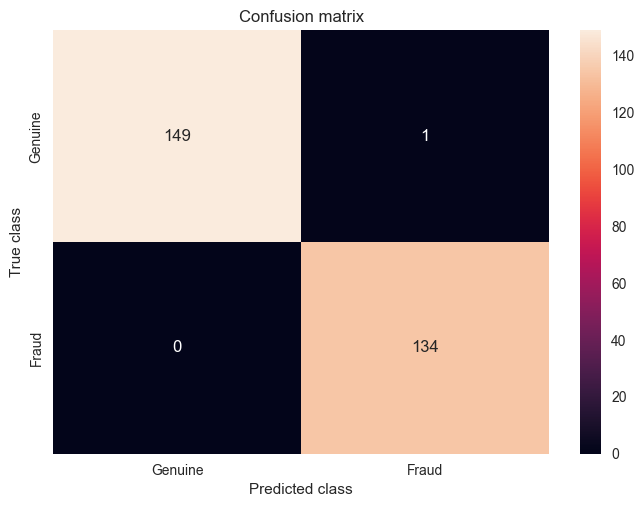

In [236]:
LABELS = ['Genuine', 'Fraud']

sns.heatmap(cm, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class')
plt.xlabel('Predicted class')  
plt.show()

In [239]:
# DECISION TREE CLASSIFIER

dc_model = DecisionTreeClassifier()
dc_model.fit(X_train, y_train)
dc_pred = dc_model.predict(X_test)

In [240]:
accuracy_score(y_test,dc_pred)

1.0

In [241]:
cm_dc = confusion_matrix(y_test,dc_pred)

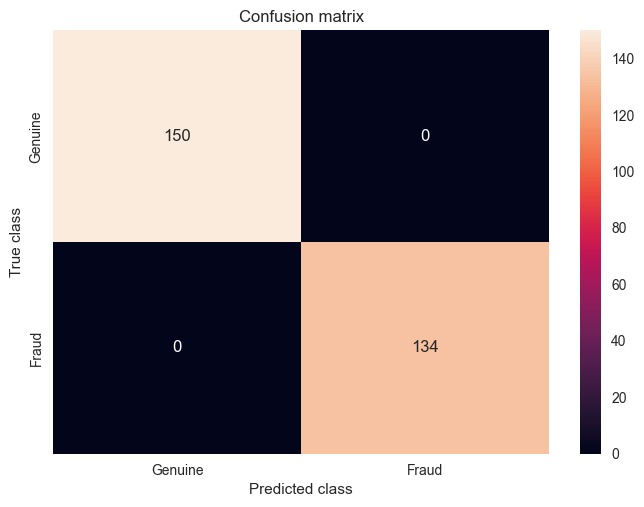

In [242]:
LABELS = ['Genuine', 'Fraud']

sns.heatmap(cm_dc, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class')
plt.xlabel('Predicted class')  
plt.show()

In [ ]:
# Both models show great accuracy in balanced data set as well on prediction of genuine and fraud transactions